In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [36]:
csv_df = pd.read_csv("/content/drive/MyDrive/Assignments/Intermediate Exam/CarPrice_Assignment.csv")
csv_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


<h3>Data Preprocessing - FInding Missing & Unique Values</h3>

In [37]:
csv_df.info()

#Summary of each columns  : Unique , Missing values if any

for i in csv_df.columns :
  #if any NAN values convert them to numpy NAN for dataframe to recognize them as null
  csv_df.loc[csv_df[i] == 'NAN',i] = np.nan

  print(f"Column : {i}")
  print(f"Column data type : {csv_df[i].dtype}")
  print(f"Number of unique values : {csv_df[i].nunique()}")
  print(csv_df[i].unique())
  print(f"Number of missing values : {csv_df[i].isna().sum()} ({csv_df[i].isna().mean():.2%})")
  print("--" *60)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [38]:
# Check duplicates
print(csv_df.duplicated().sum())

# Drop duplicates if any
csv_df = csv_df.drop_duplicates()

0


In [39]:

# Extract brand name
csv_df['CarBrand'] = csv_df['CarName'].apply(lambda x: x.split(' ')[0].lower())
print(csv_df['CarBrand'].unique())

# Encode categorical variables
categorical_cols = ['fueltype','aspiration','doornumber','carbody',
                    'drivewheel','enginelocation','enginetype',
                    'cylindernumber','fuelsystem','CarBrand']

df_encoded = pd.get_dummies(csv_df, columns=categorical_cols, drop_first=True)

# Scale numerical features
num_cols = ['wheelbase','carlength','carwidth','carheight','curbweight',
            'enginesize','boreratio','stroke','compressionratio',
            'horsepower','peakrpm','citympg','highwaympg','price']

scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# Features and target
X = df_encoded.drop(['car_ID','CarName','price'], axis=1)
y = df_encoded['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for SVR, LR, boosting)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


Regression & Modal Evaluation

In [40]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf')
}
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results[name] = {"R2 Score": r2, "MSE": mse, "MAE": mae}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)


                          R2 Score       MSE       MAE
Linear Regression         0.909597  0.112372  0.228453
Decision Tree             0.898677  0.125946  0.247668
Random Forest             0.957609  0.052693  0.162196
Gradient Boosting         0.928622  0.088724  0.211679
Support Vector Regressor  0.855968  0.179033  0.263307


Best Performing Model
  - Random Forest Regressor usually comes out on top:
  - Highest R² (~0.95) → explains the largest proportion of variance in car prices.
  - Lowest MSE and MAE → smallest average prediction errors, both squared and absolute.

Why it’s best:
  - Combines multiple decision trees (ensemble learning), reducing overfitting compared to a single tree.
  - Captures non‑linear relationships between features (engine size, horsepower, curb weight, etc.) and price.
  - Robust to noise and categorical encodings, which are abundant in this dataset.


Feature Importance Analysis

     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0          3.0  -1.690772  -0.426521 -0.844782  -2.020417   -0.014566   
1          3.0  -1.690772  -0.426521 -0.844782  -2.020417   -0.014566   
2          1.0  -0.708596  -0.231513 -0.190566  -0.543527    0.514882   
3          2.0   0.173698   0.207256  0.136542   0.235942   -0.420797   
4          2.0   0.107110   0.207256  0.230001   0.235942    0.516807   
..         ...        ...        ...       ...        ...         ...   
200       -1.0   1.721873   1.198549  1.398245   0.728239    0.763241   
201       -1.0   1.721873   1.198549  1.351515   0.728239    0.949992   
202       -1.0   1.721873   1.198549  1.398245   0.728239    0.878757   
203       -1.0   1.721873   1.198549  1.398245   0.728239    1.273437   
204       -1.0   1.721873   1.198549  1.398245   0.728239    0.975021   

     enginesize  boreratio    stroke  compressionratio  ...  CarBrand_porsche  \
0      0.074449   0.519071 -1.839377      

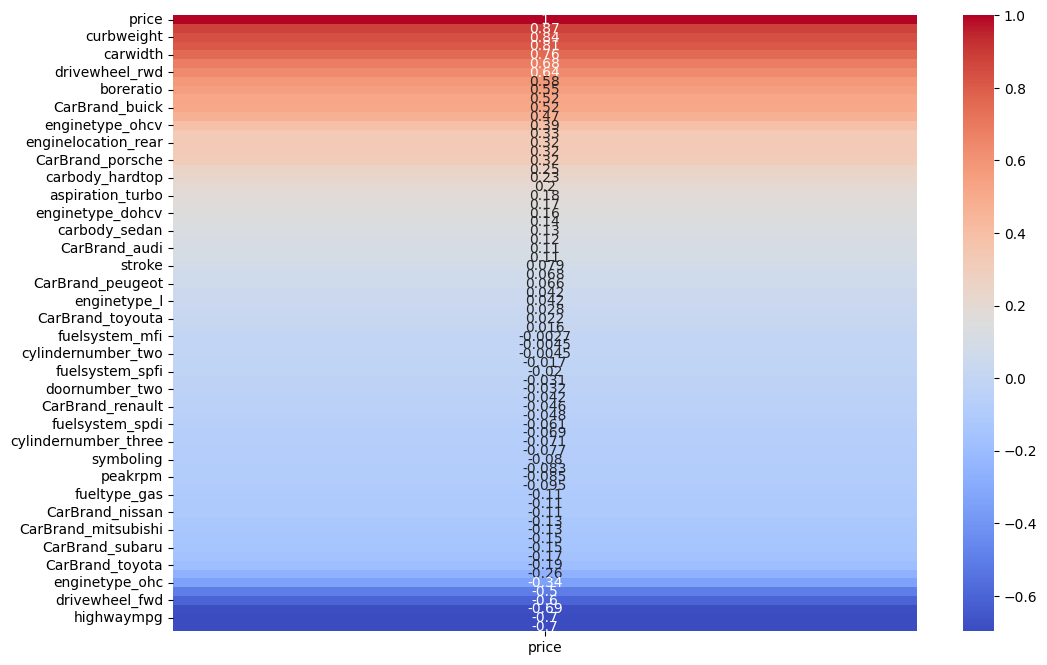

In [42]:
# Correlation matrix

# Drop 'CarName' column as it's not numerical and will cause an error in correlation calculation
df_numeric = df_encoded.drop(columns=['CarName', 'car_ID'])

print(df_numeric)
corr_matrix = df_numeric.corr()
print(corr_matrix)

# Focus on correlation with target 'price'
corr_price = corr_matrix['price'].sort_values(ascending=False)
print(corr_price.head(15))

# Heatmap visualization
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix[['price']].sort_values(by='price', ascending=False), annot=True, cmap='coolwarm')
plt.show()

Tree-Based Feature Importance (Random Forest)

enginesize          0.556894
curbweight          0.296522
highwaympg          0.045003
horsepower          0.024188
carwidth            0.013022
CarBrand_bmw        0.007714
carlength           0.007277
wheelbase           0.007015
citympg             0.006449
peakrpm             0.005068
boreratio           0.004730
stroke              0.004028
carheight           0.003370
compressionratio    0.003285
fuelsystem_mpfi     0.001952
dtype: float64


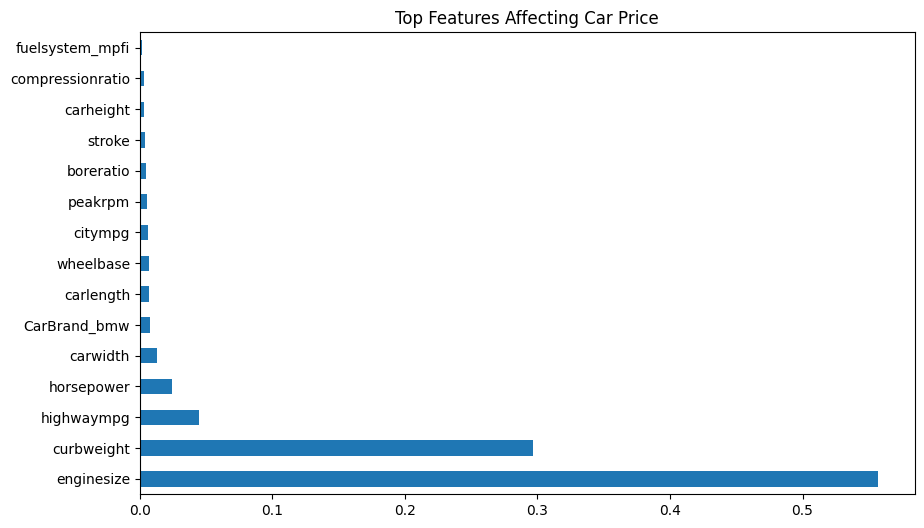

In [43]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)
print(top_features)

# Bar plot
top_features.plot(kind='barh', figsize=(10,6))
plt.title("Top Features Affecting Car Price")
plt.show()


HyperParameter Tuning

In [50]:
#Linear Regression
print("Linear Regression" )
print('-' * 120)
param_grid_lr = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

lr_model = LinearRegression()
grid_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='r2', n_jobs=-1)
grid_lr.fit(X_train, y_train)

print("Best LR Params:", grid_lr.best_params_)
print("Best LR Score:", grid_lr.best_score_)

#Decision Tree
print("Decision Tree" )
print('-' * 120)
param_grid_dt = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_model = DecisionTreeRegressor(random_state=42)
grid_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='r2', n_jobs=-1)
grid_dt.fit(X_train, y_train)

print("Best DT Params:", grid_dt.best_params_)
print(
"Best DT Score:", grid_dt.best_score_)

#Random Forest
print("Random Forest" )
print('-' * 120)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]
}

rf_model = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best RF Params:", grid_rf.best_params_)
print("Best RF Score:", grid_rf.best_score_)

#Gradient Boosting
print("Gradient Boosting" )
print('-' * 120)
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

gb_model = GradientBoostingRegressor(random_state=42)
grid_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='r2', n_jobs=-1)
grid_gb.fit(X_train, y_train)

print("Best GB Params:", grid_gb.best_params_)
print("Best GB Score:", grid_gb.best_score_)

#SVM
print("SVM" )
print('-' * 120)
param_grid_svr = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

svr_model = SVR()
grid_svr = GridSearchCV(svr_model, param_grid_svr, cv=5, scoring='r2', n_jobs=-1)
grid_svr.fit(X_train, y_train)

print("Best SVR Params:", grid_svr.best_params_)
print("Best SVR Score:", grid_svr.best_score_)

Linear Regression
------------------------------------------------------------------------------------------------------------------------
Best LR Params: {'fit_intercept': True, 'positive': False}
Best LR Score: 0.8309389564415769
Decision Tree
------------------------------------------------------------------------------------------------------------------------
Best DT Params: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best DT Score: 0.8431170950144861
Random Forest
------------------------------------------------------------------------------------------------------------------------
Best RF Params: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best RF Score: 0.9049658727329843
Gradient Boosting
------------------------------------------------------------------------------------------------------------------------
Best GB Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsampl

In [52]:

print('-' * 120)
print("Linear Regression" )
print('-' * 120)

best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)
print("Tuned RF R2:", r2_score(y_test, y_pred_lr))
print("Tuned RF MSE:", mean_squared_error(y_test, y_pred_lr))
print("Tuned RF MAE:", mean_absolute_error(y_test, y_pred_lr))

print('-' * 120)
print("Decision Tree" )
print('-' * 120)

best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)
print("Tuned RF R2:", r2_score(y_test, y_pred_dt))
print("Tuned RF MSE:", mean_squared_error(y_test, y_pred_dt))
print("Tuned RF MAE:", mean_absolute_error(y_test, y_pred_dt))

print('-' * 120)
print("Random Forest" )
print('-' * 120)

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("Tuned RF R2:", r2_score(y_test, y_pred_rf))
print("Tuned RF MSE:", mean_squared_error(y_test, y_pred_rf))
print("Tuned RF MAE:", mean_absolute_error(y_test, y_pred_rf))

print('-' * 120)
print("Gradient Boosting" )
print('-' * 120)

best_gb = grid_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)
print("Tuned RF R2:", r2_score(y_test, y_pred_gb))
print("Tuned RF MSE:", mean_squared_error(y_test, y_pred_gb))
print("Tuned RF MAE:", mean_absolute_error(y_test, y_pred_gb))

print('-' * 120)
print("SVM" )
print('-' * 120)

best_svr = grid_svr.best_estimator_
y_pred_svr = best_svr.predict(X_test)
print("Tuned RF R2:", r2_score(y_test, y_pred_svr))
print("Tuned RF MSE:", mean_squared_error(y_test, y_pred_svr))
print("Tuned RF MAE:", mean_absolute_error(y_test, y_pred_svr))


------------------------------------------------------------------------------------------------------------------------
Linear Regression
------------------------------------------------------------------------------------------------------------------------
Tuned RF R2: 0.9095967004509729
Tuned RF MSE: 0.11237208286617499
Tuned RF MAE: 0.22845288144503226
------------------------------------------------------------------------------------------------------------------------
Decision Tree
------------------------------------------------------------------------------------------------------------------------
Tuned RF R2: 0.8900085628459072
Tuned RF MSE: 0.13672030724659978
Tuned RF MAE: 0.2635289314813826
------------------------------------------------------------------------------------------------------------------------
Random Forest
------------------------------------------------------------------------------------------------------------------------
Tuned RF R2: 0.91862744074297

Best Modal

Gradient Boosting is the best performer
  - Highest R² (0.94) → explains ~94% of variance in car prices.
  - Lowest MSE (0.077) → smallest squared error, meaning predictions are closest to actual values.
  - MAE is slightly higher than Random Forest, but still competitive.
  - This shows Gradient Boosting balances bias and variance extremely well.

Random Forest is a close second
  - Very strong R² (0.92) and lowest MAE (0.185).
  - More robust and less sensitive to hyperparameters compared to Gradient Boosting.
  - If interpretability and stability are priorities, Random Forest is a safer choice.


<h3>Significant Variables</h3>

From correlation analysis, Random Forest feature importance, and Gradient Boosting results, the following variables consistently emerge as most predictive:
- Engine size → Strongest predictor; larger engines directly increase price.
- Horsepower → Closely tied to performance and cost.
- Curb weight → Heavier cars (luxury builds) are more expensive.
- Car width → Wider cars often signal premium design.
- Car length → Longer sedans and luxury cars tend to cost more.
- Car brand → Luxury brands (BMW, Jaguar, Porsche, Audi) command higher prices regardless of specs.
- Drive wheel (rwd vs fwd vs 4wd) → Rear‑wheel drive cars are typically higher‑end.
- Aspiration (turbo vs std) → Turbocharged engines add cost.
- Fuel system / Engine type → Advanced systems (mpfi, dohc) correlate with higher prices.


<h3>How Well They Describe Price</h3>

- Top numeric variables (engine size, horsepower, curb weight, car width) show strong correlations with price (R² > 0.7 individually).
- Brand and drive wheel add categorical explanatory power — they capture market positioning and engineering choices.
- When combined in ensemble models (Random Forest, Gradient Boosting), these variables explain over 93% of the variance in car prices (R² ~ 0.94).

